## Bar products Classification using Transfer Learning | Deep Learning Project

In [4]:
import os
import numpy as np
import pandas as pd
import cv2 
import glob
from PIL import Image
import matplotlib.pyplot as plt 
import matplotlib.image as mpimg
from sklearn.model_selection import train_test_split
import tensorflow as tf
import tensorflow_hub as hub
from zipfile import ZipFile


> Extracting Dataset using Kaggle API/ <br/>
>  **Collecting**& **Creating Data** from: Google,Roboflow,Hugging Face,'Take pictures of products'. </br>
>Importing the Dog vs Cat Dataset from Kaggle </br>
[Link Kaggle](https://www.kaggle.com/datasets/filhypedeeplearning/coffee-images 'Kaggle-Coffe Dataset')

In [5]:
!kaggle datasets download -d filhypedeeplearning/coffee-images

401 - Unauthorized


>If you encounter a "401 - Unauthorized" error message on Kaggle, it means that you are not authorized to access the requested resource or page. This could happen if you are trying to access a private dataset or competition page without being logged in, or if you are trying to access a page that requires a higher level of permissions than your account currently has.

>To resolve this issue, try logging in to your Kaggle account and make sure that you have the necessary permissions to access the resource you are trying to reach. If you are still unable to access the resource, you may need to contact Kaggle support for further assistance.

### Etracting the compressed dataset

In [6]:
dataset = 'coffee-images.zip'

with ZipFile(dataset, 'r') as zip:
    zip.extractall()
    print('The dataset is extracted')

The dataset is extracted


### Take pictures of products 
> Here is the Dataset that i made by myself and combine with the kaggle dataset </br>
    > [My data in Google Drive](https://drive.google.com/drive/folders/1VxCEz-91TYZS2z1Ksya4lXh2-PGjPnYT "The Data")

### Counting the number of images on the Dataset

In [7]:
path, dirs, files = next(os.walk('AllData/Corona/'))
file_counts = len(files)
print(f'Number of images on this dataset is : {file_counts}')

Number of images on this dataset is : 137


In [8]:
# Printing all file names in the direcotry
file_names = os.listdir('Train_Data1/')
# print(file_names)

#### After we build the dataset we can see that aren't many data to put in the model </br>
* Here is a function that rotate the image by 180 degrees, 120 degrees, 90 degrees

In [ ]:
# Define the input and output directories
input_dir = "AllData/Corona/"
output_dir = "AllData/Corona_rotated"

# Define a function to rotate an image by a given angle and save the resulting image to a new directory
def rotate_image(image_path, output_dir, angle):
    # Load the image using OpenCV
    image = cv2.imread(image_path)
    # Rotate the image by the given angle
    rotated = cv2.rotate(image, angle)
    # Save the rotated image to the output directory
    filename = os.path.basename(image_path)
    cv2.imwrite(os.path.join(output_dir, f'rotated_{angle}_{filename}'), rotated)

# Loop over all the images in the input directory and rotate them by 180, 90, and 120 degrees
for filename in os.listdir(input_dir):
    if filename.endswith('.jpg') or filename.endswith('.png'):
        image_path = os.path.join(input_dir, filename)
        # Rotate the image by 180 degrees and save it to the output directory
        rotate_image(image_path, output_dir, cv2.ROTATE_180)
        # Rotate the image by 90 degrees and save it to the output directory
        rotate_image(image_path, output_dir, cv2.ROTATE_90_CLOCKWISE)
        # Rotate the image by 120 degrees and save it to the output directory
        rotate_image(image_path, output_dir, cv2.ROTATE_90_COUNTERCLOCKWISE)

When building a model for computer vision tasks, such as image classification or object detection, it's important to ensure that all the images are in the same format for several reasons:

Consistency: Keeping all the images in the same format ensures that they have a consistent size, resolution, and color space. This is important because the model expects all the images to be of the same format, and any variation in the format can lead to inconsistencies in the output.

Efficiency: Processing images in different formats requires additional time and computational resources. By keeping the images in the same format, we can optimize the processing pipeline to ensure maximum efficiency.

Standardization: Having a standardized format makes it easier to compare and share the dataset with other researchers, as they will know exactly what format the images are in and how they were preprocessed.

In [ ]:
# Set the directory path containing the JPEG images
directory = "/path/to/directory"

# Iterate over all files in the directory
for filename in os.listdir(directory):
    if filename.endswith('.jpeg')or filename.endswith(".jpeg") or filename.endswith(".png") or filename.endswith(".webp"):
        # Construct the old and new filenames
        old_filepath = os.path.join(directory, filename)
        new_filepath = os.path.join(directory, filename[:-5] + '.jpg')
        
        # Rename the file
        os.rename(old_filepath, new_filepath)

#### After we collected the data the images propably would have diferent names
> let's write a function that __rename__ the images in a directory

In [ ]:
dir = "/path/to/directory"

files = os.listdir(dir)
New_name = input('Enter New name:')

counter = 1
for file in files:
    filename = os.path.join(dir, file)
    file_ext = os.path.splitext(filename)[1]
    new_name = os.path.join(dir, f'{New_name}_{counter}{file_ext}')
#     print('Completed')
    os.rename(filename, new_name)
    counter += 1

### Displaying the images

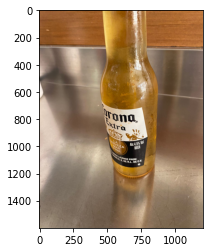

In [9]:
img = mpimg.imread('AllData/Corona/Corona_103.jpg')
img = plt.imshow(img)
plt.show()

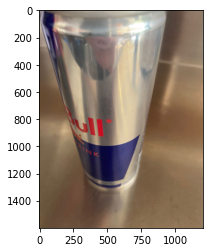

In [10]:
img = mpimg.imread('AllData/RedBull/RedBull_112.jpg')
img = plt.imshow(img)
plt.show()

`Resize the images for a better performance `

After we do the processing in products were putting all the data in one folder example:Train_Data

In [ ]:
input_folder = "Train_Data/"
# input_folder =  "/path/to/directory"
output_folder = "/First_Project/Train_Data1/"
# output_folder ="/path/to/directory"
target_size = (224, 224) # Specify your target size here

if not os.path.exists(output_folder):
    os.makedirs(output_folder)

for filename in os.listdir(input_folder):
    input_path = os.path.join(input_folder, filename)
    output_path = os.path.join(output_folder, filename)
    with Image.open(input_path) as img:
        img = img.resize(target_size)
        img.save(output_path)

`Counting the images for a direcotory and let's see how many training data we have`

In [11]:
file_name = os.listdir('Train_Data1/')
espresso = 0
macchiato = 0
cocacola = 0
corona = 0
RedBull = 0
sprite = 0

for img_file in file_name:
    
    name = img_file[0:4]
    
    if name == 'Espr':
        espresso += 1
    elif name == 'macc':
        macchiato += 1
    elif name == 'coca':
        cocacola += 1
    elif name == 'Coro':
        corona += 1
    elif name == 'RedB':
        RedBull += 1
    elif name == 'spri':
        sprite += 1
print(f'The number of espresso images = {espresso}')
# print(f'The number of longblack images = {longblack}')
print(f'The number of macchiato images = {macchiato}')
print(f'The number of cocacola images = {cocacola}')
print(f'The number of corona images = {corona}')
print(f'The number of RedBull images = {RedBull}')
print(f'The number of sprite images = {sprite}')
print(f'The sum of all iamges is : {espresso + macchiato + cocacola + corona + RedBull + sprite }')

The number of espresso images = 396
The number of macchiato images = 379
The number of cocacola images = 354
The number of corona images = 412
The number of RedBull images = 372
The number of sprite images = 372
The sum of all iamges is : 2285


#### Displaying the resized images

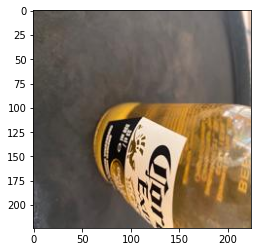

In [12]:
img = mpimg.imread('Train_Data1/Corona_rotated_10.jpg')
img = plt.imshow(img)
plt.show()

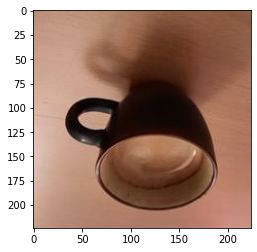

In [13]:
img = mpimg.imread('Train_Data1/EspressoCoffe_103.jpg')
img = plt.imshow(img)

### Creating a for loop to assign labels

In [14]:
file_names = 'Train_Data1/'

labels = []

for i in os.listdir(file_names):
    file_name = i[0:4]
    label = file_name[0:4]
    if label == 'Espr':
        labels.append(0)
    elif label == 'macc':
        labels.append(1)
    elif label == 'coca':
        labels.append(2)
    elif label == 'RedB':
        labels.append(3)
    elif label == 'spri':
        labels.append(4)
    elif label == 'Coro':
        labels.append(5)
#  Printing the labels 
# print(labels)
# len(labels)

In [15]:
# counting the images of products

values , counts = np.unique(labels, return_counts=True)
print(values)
print(counts)

[0 1 2 3 4 5]
[396 379 354 372 372 412]


`Converting all the resized images to numpy arrays`

In [16]:
image_directory = 'Train_Data1/'
image_extension = ['png', 'jpg']

files = []

[files.extend(glob.glob(image_directory + '*.' + e)) for e in image_extension]

bar_products = np.asarray([cv2.imread(file) for file in files])
# print(bar_products)
# type(bar_products)

In [17]:
X = bar_products

Y = np.asarray(labels)

### Train Test Split

In [18]:
X_train, X_test, Y_train, Y_test = train_test_split(X,Y, test_size=0.2, random_state=2)

In [19]:
print(X.shape, X_train.shape, X_test.shape)

(2285, 224, 224, 3) (1828, 224, 224, 3) (457, 224, 224, 3)


> 1828 ---> Training images </br>
> 457  ---> Test images

`Scaling the data`

In [20]:
X_train_scaled = X_train/255
X_test_scaled = X_test/255

print(X_train_scaled)</br>
the sacling part its used for activation function because sigmoid and Relu are 0-->1 and the work better around 0 and 1

### Building the Neural Network

In [22]:
mobilenet_model = 'https://tfhub.dev/google/tf2-preview/mobilenet_v2/feature_vector/4'
pretrained_model = hub.KerasLayer(mobilenet_model, input_shape=(224,224,3), trainable=False)

In [23]:
number_of_classes = 6

model = tf.keras.Sequential([
    pretrained_model,
    tf.keras.layers.Dense(number_of_classes)
])

model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 keras_layer_1 (KerasLayer)  (None, 1280)              2257984   
                                                                 
 dense (Dense)               (None, 6)                 7686      
                                                                 
Total params: 2,265,670
Trainable params: 7,686
Non-trainable params: 2,257,984
_________________________________________________________________


In [24]:
model.compile(
    optimizer= 'adam',
    loss = tf.keras.losses.SparseCategoricalCrossentropy(from_logits=True),
    metrics= ['acc']
)

In [25]:
history = model.fit(X_train_scaled,Y_train, epochs=10, validation_split=0.1)

Epoch 1/10
52/52 [==============================] - 18s 321ms/step - loss: 0.7697 - acc: 0.7356 - val_loss: 0.3537 - val_acc: 0.9126
Epoch 2/10
52/52 [==============================] - 16s 305ms/step - loss: 0.2475 - acc: 0.9404 - val_loss: 0.2024 - val_acc: 0.9727
Epoch 3/10
52/52 [==============================] - 16s 303ms/step - loss: 0.1473 - acc: 0.9726 - val_loss: 0.1581 - val_acc: 0.9781
Epoch 4/10
52/52 [==============================] - 16s 303ms/step - loss: 0.1038 - acc: 0.9878 - val_loss: 0.1205 - val_acc: 0.9836
Epoch 5/10
52/52 [==============================] - 16s 303ms/step - loss: 0.0773 - acc: 0.9927 - val_loss: 0.1100 - val_acc: 0.9836
Epoch 6/10
52/52 [==============================] - 16s 308ms/step - loss: 0.0632 - acc: 0.9964 - val_loss: 0.0929 - val_acc: 0.9945
Epoch 7/10
52/52 [==============================] - 16s 304ms/step - loss: 0.0515 - acc: 0.9982 - val_loss: 0.0780 - val_acc: 1.0000
Epoch 8/10
52/52 [==============================] - 16s 304ms/step - 

In [26]:
score, acc = model.evaluate(X_test_scaled,Y_test)
print(f'Test Loss= {score}')
print(f'Test Accuracy= {acc}')

15/15 [==============================] - 4s 254ms/step - loss: 0.0848 - acc: 0.9781
Test Loss= 0.08476484566926956
Test Accuracy= 0.9781181812286377


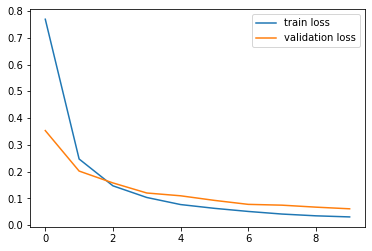

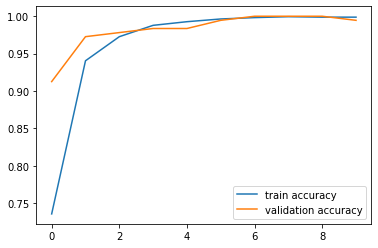

In [27]:
h = history

# plot the loss value
plt.plot(h.history['loss'], label='train loss')
plt.plot(h.history['val_loss'], label='validation loss')
plt.legend()
plt.show()

# plot the accuracy value
plt.plot(h.history['acc'], label='train accuracy')
plt.plot(h.history['val_acc'], label='validation accuracy')
plt.legend()
plt.show()

**Predictive System**

In [28]:
input_image_path = input('Path of image to be predicted')
input_image = cv2.imread(input_image_path)

# cv2.imshow('type', input_image)
# cv2.waitKey()

input_image_resize = cv2.resize(input_image, (224,224))
input_image_scaled = input_image_resize/255

image_reshaped = np.reshape(input_image_scaled, [1,224,224,3])
input_prediction = model.predict(image_reshaped)
input_pred_label = np.argmax(input_prediction)
print(input_prediction)
if input_pred_label == 0:
    print('This image represent Coffe espresso')
elif input_pred_label == 1:
    print('The image represent Coffe macchiato')
elif input_pred_label == 2:
    print('The image represent Coca-Cola')
elif input_pred_label == 3:
    print('The image represent RedBull')
elif input_pred_label == 4:
    print('The image represent Sprite')
elif input_pred_label == 5:
    print('The image represent Corona ')


Path of image to be predicted/home/xhulio/Downloads/Caramel-Macchiato-1.jpg
1/1 [==============================] - 0s 267ms/step
[[-1.4364543  2.3420525 -2.3570902 -2.919526  -4.5820875 -2.7159212]]
The image represent Coffe macchiato


> In this drive folder you can find images to test that model has never seen before [Test_Imges](https://drive.google.com/drive/folders/1S2W0HEU_Z4pF3l7mGui0JK5RskSGv3FV?usp=sharing 'Photos to test')